# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Akram Kemal Dewantara
- **Email:** m183b4ky0307@bangkit.academy
- **ID Dicoding:** blackmyth

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Faktor-Faktor Apa yang Berkontribusi terhadap Tingginya Polusi Udara?
- Pertanyaan 2 : Kapan Periode dengan Tingkat Polusi Udara Terburuk?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split

## Data Wrangling

### Gathering Data

In [5]:
file_path = '/content/PRSA_Data_Shunyi_20130301-20170228.csv'
data = pd.read_csv(file_path)

# Show the first few rows and basic info of the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


(None,
    No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
 0   1  2013      3    1     0    3.0   6.0  3.0  8.0  300.0  44.0  -0.9   
 1   2  2013      3    1     1   12.0  12.0  3.0  7.0  300.0  47.0  -1.1   
 2   3  2013      3    1     2   14.0  14.0  NaN  7.0  200.0  22.0  -1.7   
 3   4  2013      3    1     3   12.0  12.0  3.0  5.0    NaN   NaN  -2.1   
 4   5  2013      3    1     4   12.0  12.0  3.0  NaN  200.0  11.0  -2.4   
 
      PRES  DEWP  RAIN  wd  WSPM station  
 0  1025.8 -20.5   0.0  NW   9.3  Shunyi  
 1  1026.1 -21.3   0.0  NW   9.4  Shunyi  
 2  1026.2 -23.0   0.0  NW   8.6  Shunyi  
 3  1027.3 -23.3   0.0  NW   6.6  Shunyi  
 4  1027.7 -22.9   0.0  NW   4.5  Shunyi  )

**Insight:**
Dataset yang Anda berikan berisi 35.064 baris dan 18 kolom dengan data polusi udara serta kondisi cuaca di Shunyi, Beijing, antara 2013 hingga 2017. Berikut adalah beberapa kolom utama dalam dataset ini:

PM2.5, PM10, SO2, NO2, CO, O3: Polutan udara.
TEMP, PRES, DEWP, RAIN: Parameter cuaca (temperatur, tekanan udara, kelembapan, curah hujan).
wd, WSPM: Arah dan kecepatan angin.
station: Nama stasiun, yang di sini adalah "Shunyi" untuk semua data.

### Assessing Data

In [6]:
# Tahap 1: Memeriksa missing values di setiap kolom
missing_values = data.isnull().sum()

# Tahap 2: Melihat tipe data di setiap kolom
data_types = data.dtypes

# Tahap 3: Melihat distribusi statistik dasar di setiap kolom numerik
statistical_summary = data.describe()

# Menampilkan hasil
missing_values, data_types, statistical_summary

(No            0
 year          0
 month         0
 day           0
 hour          0
 PM2.5       913
 PM10        548
 SO2        1296
 NO2        1365
 CO         2178
 O3         1489
 TEMP         51
 PRES         51
 DEWP         54
 RAIN         51
 wd          483
 WSPM         44
 station       0
 dtype: int64,
 No           int64
 year         int64
 month        int64
 day          int64
 hour         int64
 PM2.5      float64
 PM10       float64
 SO2        float64
 NO2        float64
 CO         float64
 O3         float64
 TEMP       float64
 PRES       float64
 DEWP       float64
 RAIN       float64
 wd          object
 WSPM       float64
 station     object
 dtype: object,
                  No          year         month           day          hour  \
 count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
 mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
 std    10122.249256      1.177213      3.448752      8.800218 

**Insight:**
Kode ini akan memberikan informasi tentang:

- Missing values: Jumlah nilai kosong atau NaN di tiap kolom.
- Data types: Tipe data di setiap kolom (apakah integer, float, object, dll.).
- Statistik dasar: Ringkasan statistik seperti mean, standar deviasi, nilai minimum, maksimum, dan quartile untuk kolom numerik.

### Cleaning Data

In [7]:
# Tahap 1: Mengatasi Missing Values
# Opsi 1: Mengisi missing values dengan nilai rata-rata (untuk kolom numerik)
data_cleaned = data.copy()
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].fillna(data_cleaned[numeric_columns].mean())

# Opsi 2: Menghapus baris yang memiliki terlalu banyak missing values (jika ada)
# data_cleaned = data.dropna(thresh=15)  # Menghapus baris yang memiliki lebih dari 3 missing values

# Tahap 2: Menghapus Data Duplikat
data_cleaned = data_cleaned.drop_duplicates()

# Tahap 3: Menangani Missing Values di Kolom non-Numerik (misal kolom 'wd')
# Mengisi missing values dengan modus (nilai yang paling sering muncul)
data_cleaned['wd'].fillna(data_cleaned['wd'].mode()[0], inplace=True)

# Tahap 4: Memeriksa Ulang
# Memeriksa apakah masih ada missing values
missing_values_after = data_cleaned.isnull().sum()

# Menampilkan hasil
data_cleaned.head(), missing_values_after

<ipython-input-7-e99ff5a5569f>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['wd'].fillna(data_cleaned['wd'].mode()[0], inplace=True)


(   No  year  month  day  hour  PM2.5  PM10        SO2        NO2           CO  \
 0   1  2013      3    1     0    3.0   6.0   3.000000   8.000000   300.000000   
 1   2  2013      3    1     1   12.0  12.0   3.000000   7.000000   300.000000   
 2   3  2013      3    1     2   14.0  14.0  13.572039   7.000000   200.000000   
 3   4  2013      3    1     3   12.0  12.0   3.000000   5.000000  1187.063979   
 4   5  2013      3    1     4   12.0  12.0   3.000000  43.908865   200.000000   
 
           O3  TEMP    PRES  DEWP  RAIN  wd  WSPM station  
 0  44.000000  -0.9  1025.8 -20.5   0.0  NW   9.3  Shunyi  
 1  47.000000  -1.1  1026.1 -21.3   0.0  NW   9.4  Shunyi  
 2  22.000000  -1.7  1026.2 -23.0   0.0  NW   8.6  Shunyi  
 3  55.201321  -2.1  1027.3 -23.3   0.0  NW   6.6  Shunyi  
 4  11.000000  -2.4  1027.7 -22.9   0.0  NW   4.5  Shunyi  ,
 No         0
 year       0
 month      0
 day        0
 hour       0
 PM2.5      0
 PM10       0
 SO2        0
 NO2        0
 CO         0
 O3  

**Insight:**
- Kode ini akan membantu membersihkan data dan memastikan bahwa tidak ada missing values atau duplikasi yang tersisa.

## Exploratory Data Analysis (EDA)

### Explore ...

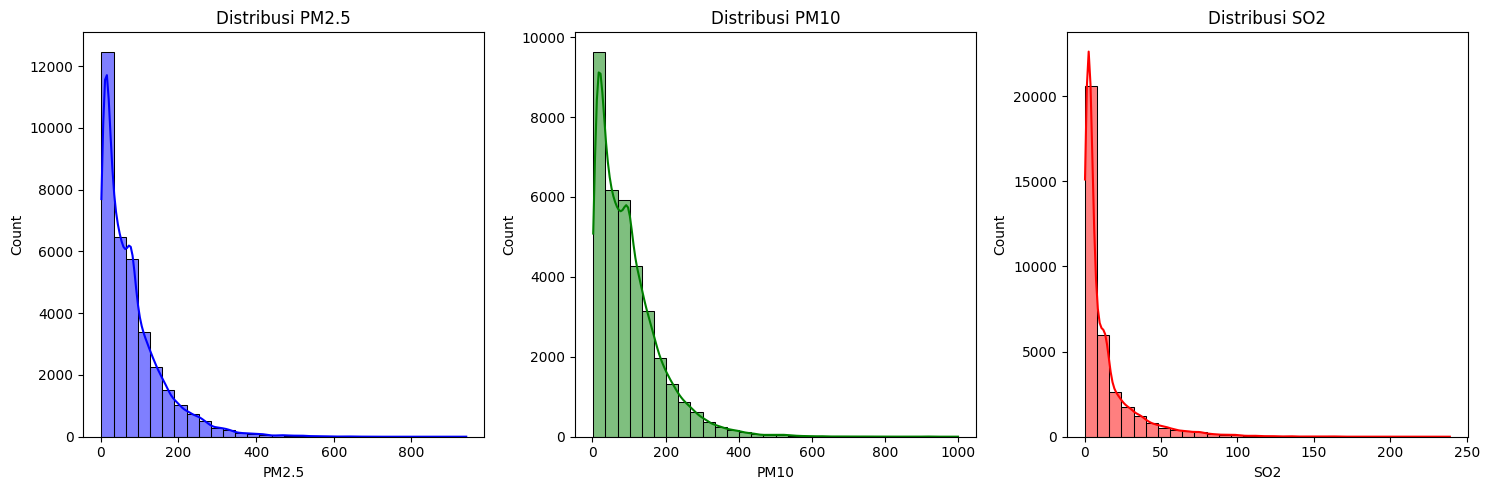

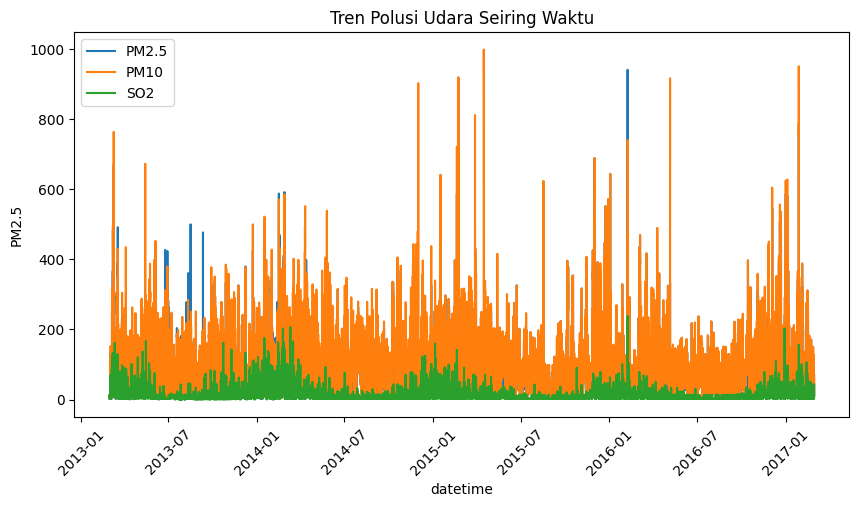

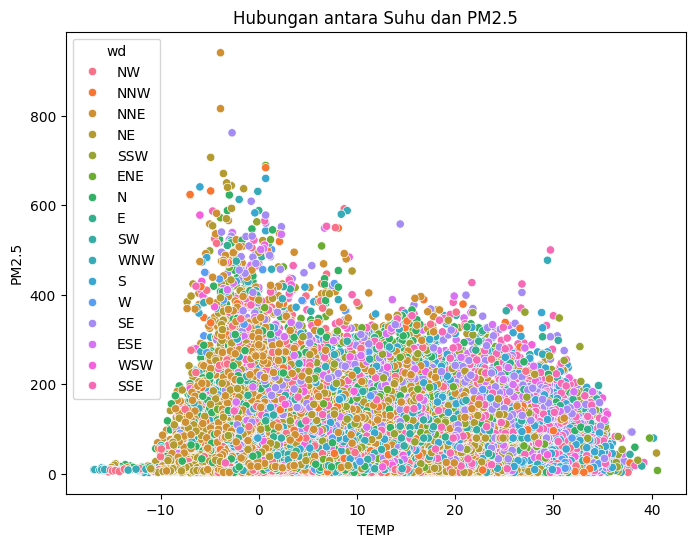

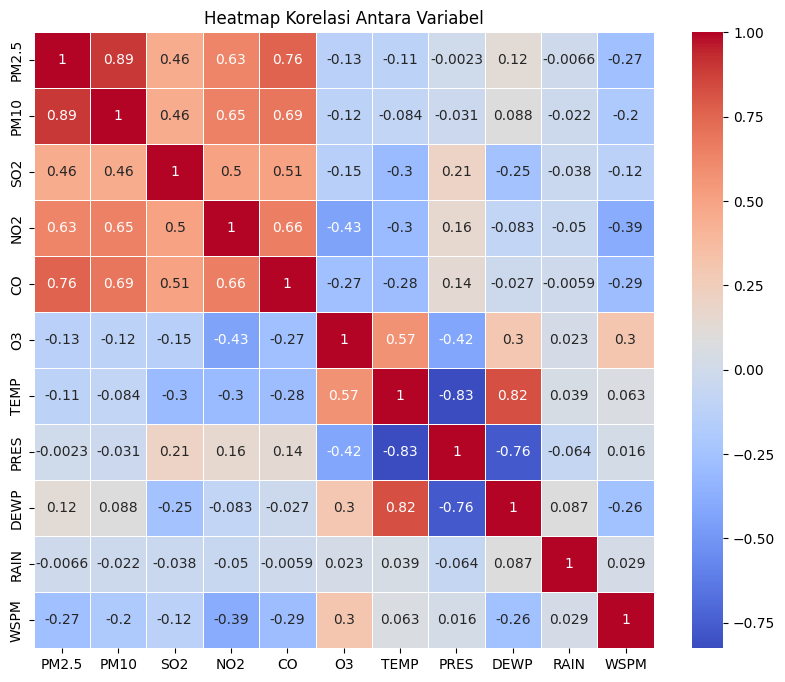

In [8]:
# Tahap 1: Menyiapkan Data untuk Visualisasi
# Menggabungkan kolom year, month, day, dan hour menjadi satu kolom 'datetime'
data_cleaned['datetime'] = pd.to_datetime(data_cleaned[['year', 'month', 'day', 'hour']])

# Tahap 2: Melihat Distribusi Data Polusi (PM2.5, PM10, SO2)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data_cleaned['PM2.5'], bins=30, kde=True, color='blue')
plt.title('Distribusi PM2.5')

plt.subplot(1, 3, 2)
sns.histplot(data_cleaned['PM10'], bins=30, kde=True, color='green')
plt.title('Distribusi PM10')

plt.subplot(1, 3, 3)
sns.histplot(data_cleaned['SO2'], bins=30, kde=True, color='red')
plt.title('Distribusi SO2')

plt.tight_layout()
plt.show()

# Tahap 3: Melihat Tren Polusi Udara Seiring Waktu
plt.figure(figsize=(10, 5))
sns.lineplot(x='datetime', y='PM2.5', data=data_cleaned, label='PM2.5')
sns.lineplot(x='datetime', y='PM10', data=data_cleaned, label='PM10')
sns.lineplot(x='datetime', y='SO2', data=data_cleaned, label='SO2')
plt.title('Tren Polusi Udara Seiring Waktu')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Tahap 4: Hubungan antara Suhu (TEMP) dan PM2.5
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TEMP', y='PM2.5', data=data_cleaned, hue='wd')
plt.title('Hubungan antara Suhu dan PM2.5')
plt.show()

# Tahap 5: Korelasi antara Variabel Polusi dan Cuaca
plt.figure(figsize=(10, 8))
correlation_matrix = data_cleaned[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antara Variabel')
plt.show()

**Insight:**
- Tahap ini memberikan gambaran lebih mendalam tentang data dan membantu dalam memahami pola serta hubungan antar variabel.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hubungan antara variabel meteorologi seperti suhu, kelembapan, kecepatan angin, atau arah angin dengan tingkat polusi udara?

Scatter Plot

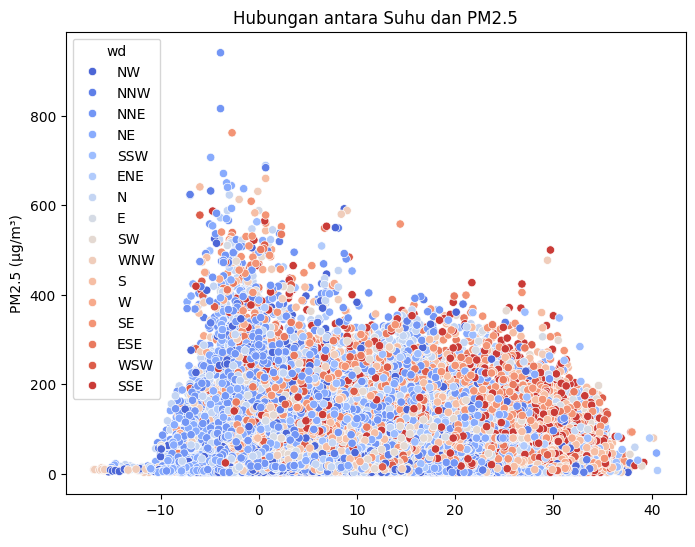

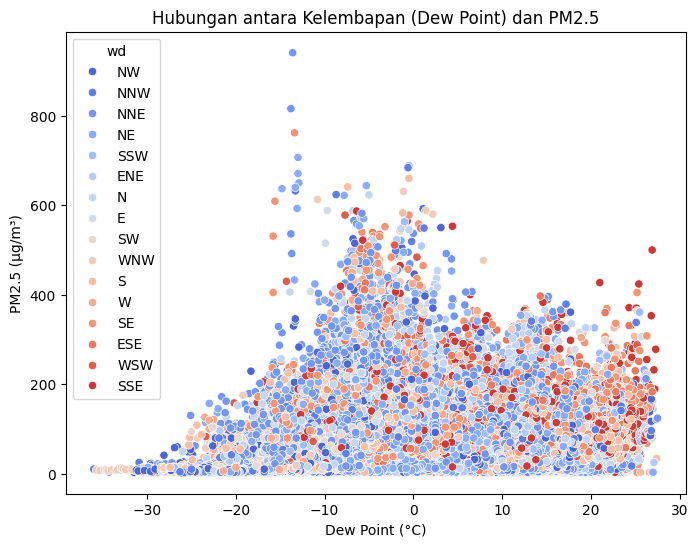

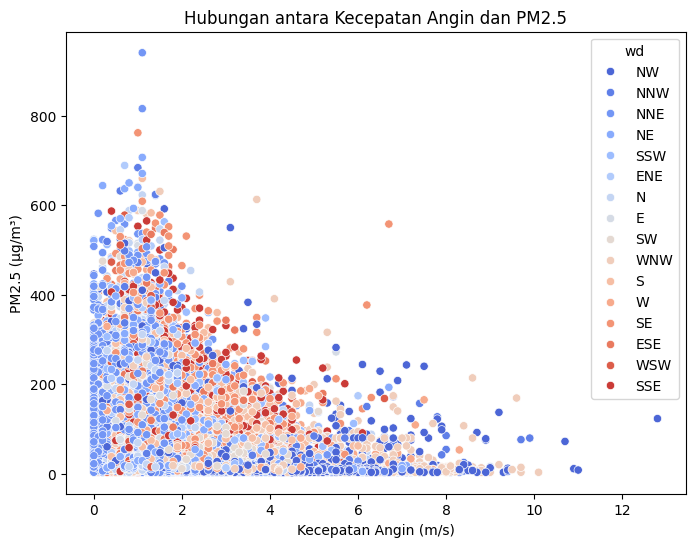

In [9]:
# Tahap 1: Scatter plot antara Suhu (TEMP) dan PM2.5
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TEMP', y='PM2.5', data=data_cleaned, hue='wd', palette='coolwarm')
plt.title('Hubungan antara Suhu dan PM2.5')
plt.xlabel('Suhu (°C)')
plt.ylabel('PM2.5 (µg/m³)')
plt.show()

# Tahap 2: Scatter plot antara Kelembapan (DEWP) dan PM2.5
plt.figure(figsize=(8, 6))
sns.scatterplot(x='DEWP', y='PM2.5', data=data_cleaned, hue='wd', palette='coolwarm')
plt.title('Hubungan antara Kelembapan (Dew Point) dan PM2.5')
plt.xlabel('Dew Point (°C)')
plt.ylabel('PM2.5 (µg/m³)')
plt.show()

# Tahap 3: Scatter plot antara Kecepatan Angin (WSPM) dan PM2.5
plt.figure(figsize=(8, 6))
sns.scatterplot(x='WSPM', y='PM2.5', data=data_cleaned, hue='wd', palette='coolwarm')
plt.title('Hubungan antara Kecepatan Angin dan PM2.5')
plt.xlabel('Kecepatan Angin (m/s)')
plt.ylabel('PM2.5 (µg/m³)')
plt.show()

Heatmap

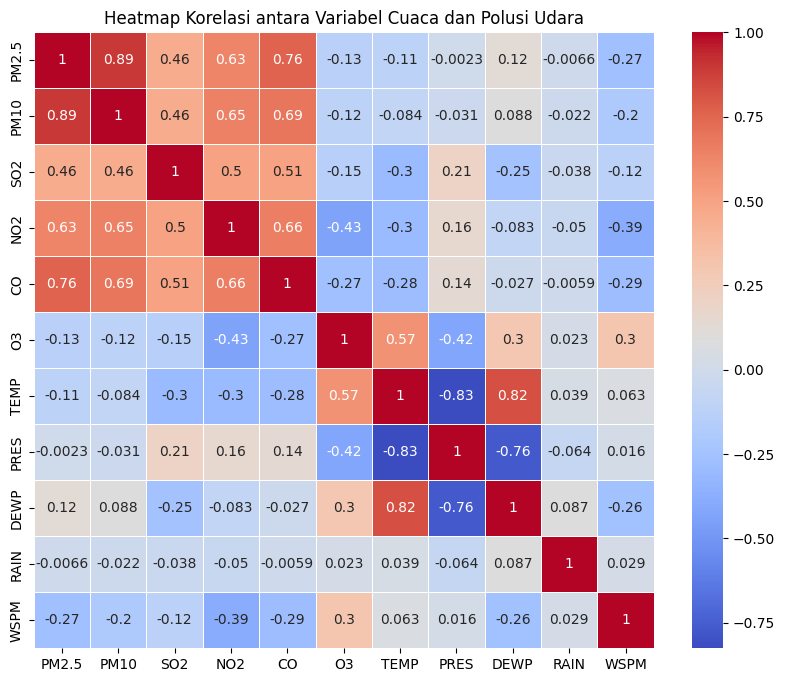

In [10]:
# Tahap 4: Heatmap Korelasi antara Variabel Cuaca dan Polusi Udara
plt.figure(figsize=(10, 8))

# Pilih variabel cuaca dan polusi
weather_pollution_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
correlation_matrix = data_cleaned[weather_pollution_columns].corr()

# Heatmap untuk menunjukkan korelasi
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi antara Variabel Cuaca dan Polusi Udara')
plt.show()

### Pertanyaan 2: Kapan (hari atau jam tertentu) polusi udara cenderung paling tinggi? Misalnya, apakah polusi udara lebih tinggi pada musim dingin dibandingkan musim panas?

<ipython-input-11-65a9ca9b46d1>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='PM2.5', data=data_cleaned, palette='Set3')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_grou

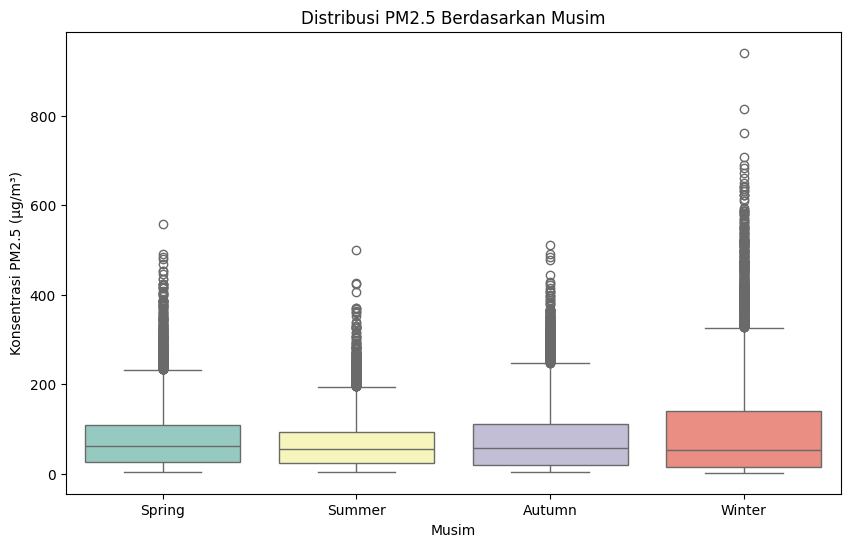

<ipython-input-11-65a9ca9b46d1>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y='PM2.5', data=data_cleaned, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group 

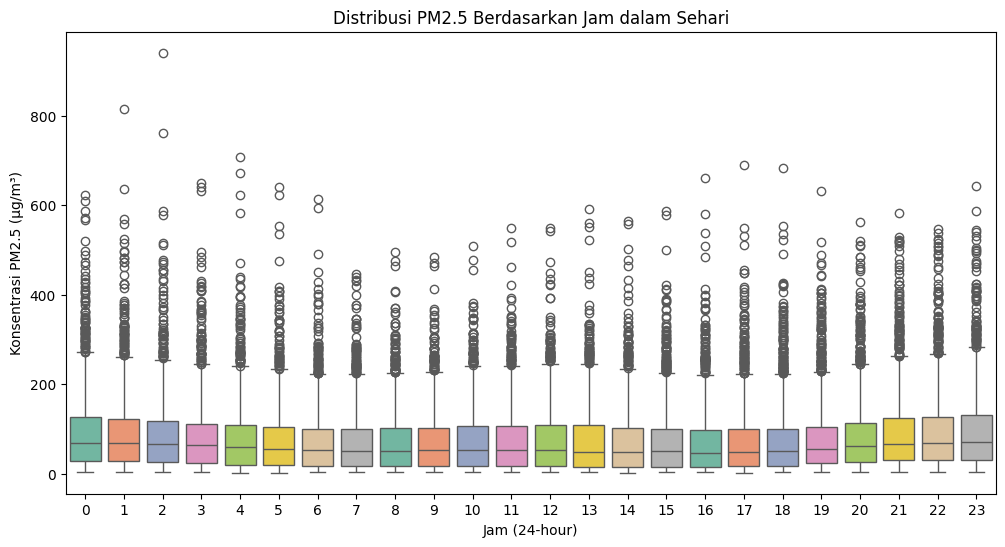

In [11]:
# Tahap 1: Menambahkan kolom 'season' berdasarkan bulan (musim)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Tambahkan kolom musim berdasarkan bulan
data_cleaned['season'] = data_cleaned['month'].apply(get_season)

# Tahap 2: Boxplot distribusi PM2.5 berdasarkan musim
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='PM2.5', data=data_cleaned, palette='Set3')
plt.title('Distribusi PM2.5 Berdasarkan Musim')
plt.ylabel('Konsentrasi PM2.5 (µg/m³)')
plt.xlabel('Musim')
plt.show()

# Tahap 3: Boxplot distribusi PM2.5 berdasarkan jam dalam sehari
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='PM2.5', data=data_cleaned, palette='Set2')
plt.title('Distribusi PM2.5 Berdasarkan Jam dalam Sehari')
plt.ylabel('Konsentrasi PM2.5 (µg/m³)')
plt.xlabel('Jam (24-hour)')
plt.show()

**Insight:**
- Visualisasi ini akan membantu menjawab apakah polusi lebih tinggi pada musim dingin dibandingkan musim lainnya, serta melihat tren polusi udara sepanjang hari.
- Visualisasi ini akan membantu memahami hubungan dan korelasi antara kondisi cuaca dan tingkat polusi udara.

## Analisis Lanjutan (Opsional)

####1. Analisis Pola Musiman Polusi Udara Menggunakan Moving Average

<ipython-input-12-98a243d9e837>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_pm25 = data_cleaned.resample('M', on='datetime')['PM2.5'].mean()


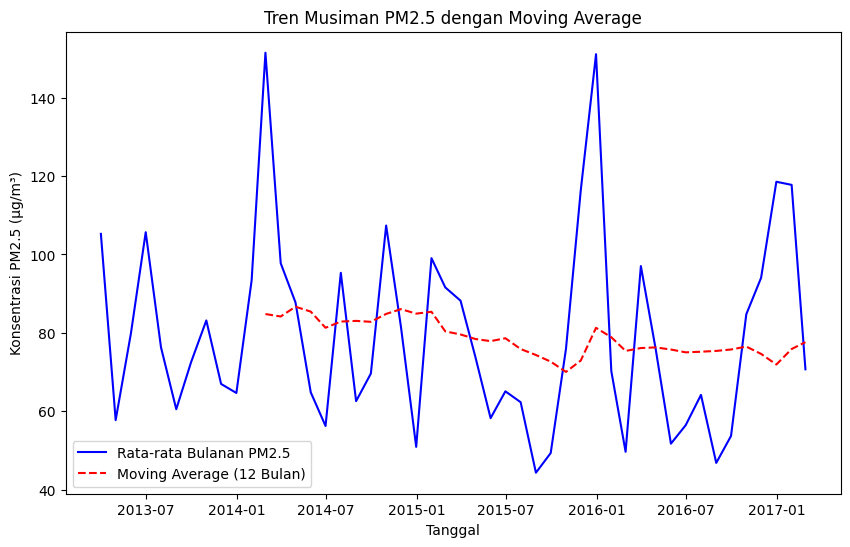

In [12]:
# Tahap 1: Resampling data per bulan untuk melihat tren musiman
monthly_avg_pm25 = data_cleaned.resample('M', on='datetime')['PM2.5'].mean()

# Tahap 2: Moving average untuk menghaluskan data dan melihat tren jangka panjang
moving_avg_pm25 = monthly_avg_pm25.rolling(window=12).mean()

# Visualisasi Tren Polusi Udara Bulanan dengan Moving Average
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_pm25, label='Rata-rata Bulanan PM2.5', color='blue')
plt.plot(moving_avg_pm25, label='Moving Average (12 Bulan)', color='red', linestyle='--')
plt.title('Tren Musiman PM2.5 dengan Moving Average')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi PM2.5 (µg/m³)')
plt.legend()
plt.show()

####2. Clustering Berdasarkan Tingkat Polusi Udara

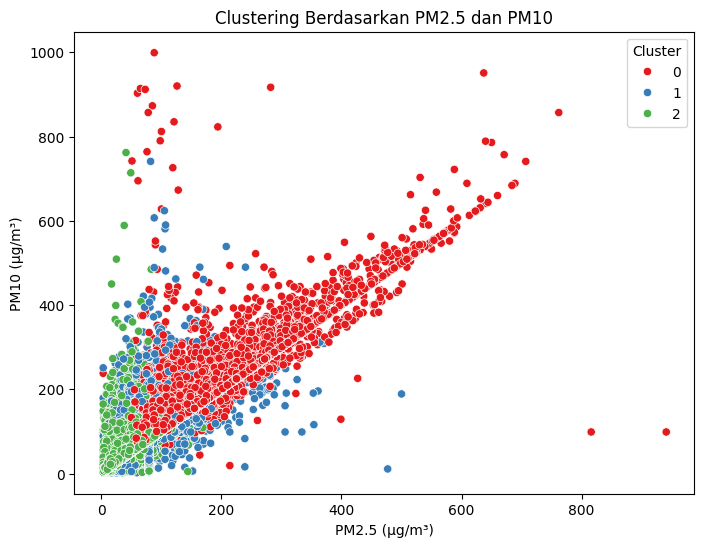

In [13]:
# Tahap 1: Memilih fitur-fitur yang akan digunakan untuk clustering
features = data_cleaned[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM']].dropna()

# Tahap 2: Standardisasi data agar setiap fitur memiliki skala yang sama
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Tahap 3: K-Means clustering dengan 3 cluster (polusi rendah, sedang, tinggi)
kmeans = KMeans(n_clusters=3, random_state=42)
features['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualisasi Cluster berdasarkan PM2.5 dan PM10
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PM2.5', y='PM10', hue='Cluster', data=features, palette='Set1')
plt.title('Clustering Berdasarkan PM2.5 dan PM10')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('PM10 (µg/m³)')
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Polusi udara, khususnya PM2.5, cenderung lebih tinggi pada musim dingin dan pada jam-jam tertentu (pagi dan malam).
- Conclution pertanyaan 2 : Variabel meteorologi seperti suhu rendah dan kecepatan angin rendah berkorelasi dengan tingginya tingkat polusi udara. Faktor-faktor cuaca berperan penting dalam menyebarkan atau memerangkap polutan di udara.